
✅ Devices available for computation:
 - Type: CPU, Name: /physical_device:CPU:0
 - Type: GPU, Name: /physical_device:GPU:0

🔎 Preview of California Housing Data:
+--------+----------+--------------------+--------------------+------------+--------------------+----------+-----------+------------------+
| MedInc | HouseAge |      AveRooms      |     AveBedrms      | Population |      AveOccup      | Latitude | Longitude | MedianHouseValue |
+--------+----------+--------------------+--------------------+------------+--------------------+----------+-----------+------------------+
| 8.3252 |   41.0   | 6.984126984126984  | 1.0238095238095237 |   322.0    | 2.5555555555555554 |  37.88   |  -122.23  |      4.526       |
| 8.3014 |   21.0   | 6.238137082601054  | 0.9718804920913884 |   2401.0   | 2.109841827768014  |  37.86   |  -122.22  |      3.585       |
| 7.2574 |   52.0   | 8.288135593220339  | 1.073446327683616  |   496.0    | 2.8022598870056497 |  37.85   |  -122.24  |      3.521      

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1858/1858 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.9696 - val_loss: 0.5186
Epoch 2/10
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.3940 - val_loss: 0.3838
Epoch 3/10
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3427 - val_loss: 0.3674
Epoch 4/10
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.3343 - val_loss: 0.3595
Epoch 5/10
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3225 - val_loss: 0.3509
Epoch 6/10
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3134 - val_loss: 0.3556
Epoch 7/10
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3014 - val_loss: 0.3439
Epoch 8/10
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.3088 - val_loss: 0.3405
Epoch 9/10
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3079 - val_loss: 0.3478
Epoch 10/10
1858/1858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3082 - val_loss: 0.3384

📈 Model performance on test dataset:
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
➡️ Mean Squared Error (MSE): 0.3094
➡️ R² (Coeffic

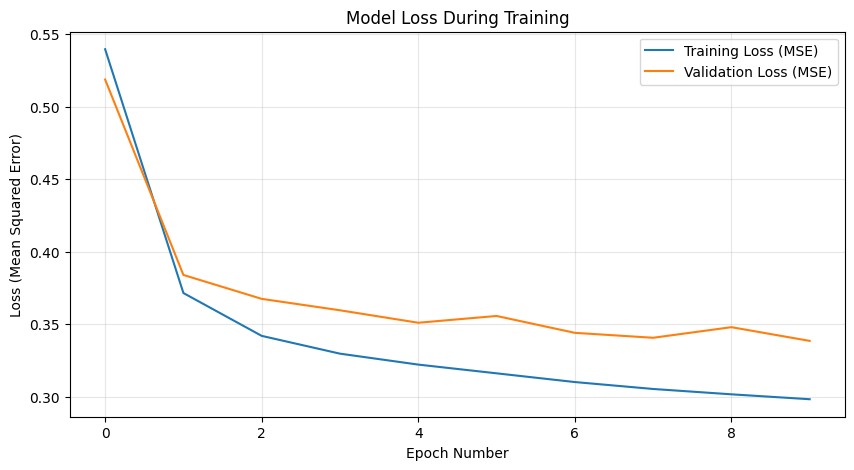

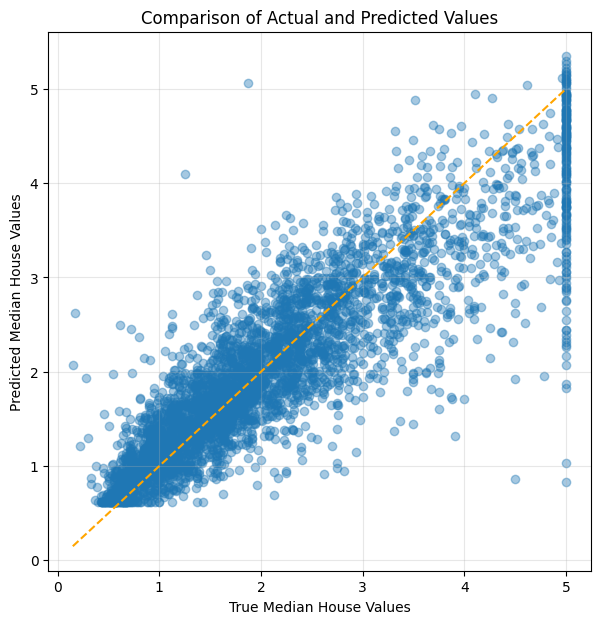

In [2]:
# California Housing Price Prediction using Neural Network (TensorFlow)
# Author: [Your Name]
# Date: [Today's Date]

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from tabulate import tabulate

# List the available computation devices
print("\n✅ Devices available for computation:")
for device in tf.config.list_physical_devices():
    print(f" - Type: {device.device_type}, Name: {device.name}")

# Load California Housing Dataset
california_data = fetch_california_housing()
features = california_data.data
target = california_data.target

# Create DataFrame from dataset and save it locally as CSV
housing_df = pd.DataFrame(features, columns=california_data.feature_names)
housing_df['MedianHouseValue'] = target

# Display first 10 rows of the dataset in tabular format
print("\n🔎 Preview of California Housing Data:")
print(tabulate(housing_df.head(10), headers='keys', tablefmt='pretty', showindex=False))

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2, random_state=42)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network model architecture (unchanged)
housing_model = Sequential([
    Dense(16, activation='relu', input_shape=(8,)),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

# Learning rate scheduler setup (unchanged)
learning_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=1000,
    decay_rate=0.9)

housing_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_schedule),
                      loss='mean_squared_error')

# Train the model with a validation split
print("\n🚀 Training begins...")
training_history = housing_model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=8,
    validation_split=0.1,
    verbose=1
)

# Model evaluation using test data
print("\n📈 Model performance on test dataset:")
predictions = housing_model.predict(X_test_scaled).flatten()
test_mse = mean_squared_error(y_test, predictions)
test_r2 = r2_score(y_test, predictions)

print(f"➡️ Mean Squared Error (MSE): {test_mse:.4f}")
print(f"➡️ R² (Coefficient of Determination): {test_r2:.4f}")

# Visualize training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(training_history.history['loss'], label='Training Loss (MSE)')
plt.plot(training_history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss During Training')
plt.xlabel('Epoch Number')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Actual versus Predicted values scatter plot
plt.figure(figsize=(7, 7))
plt.scatter(y_test, predictions, alpha=0.4)
plt.plot([target.min(), target.max()], [target.min(), target.max()], '--', color='orange')
plt.xlabel('True Median House Values')
plt.ylabel('Predicted Median House Values')
plt.title('Comparison of Actual and Predicted Values')
plt.grid(alpha=0.3)
plt.show()
